# **Unsuperviced Learning**

## Experimentation:
- __Clusterization Model Experiments__
- __K-Neriest Neighbour__
- __Baysian - Gaussian |Mixtures__
- __Hidden Markov Models__
- __Self-Orientating Maps__
---
# Label Engineering
- configuring labes for **Respiratory Hysteresis**
---
># ⚠️ Code for **Dynamic Time Warping**  is depracated

## Maintainer

- **GitHub**: [Molderon](https://github.com/Molderon)
- **Email**: [Molderon@proton.me](mailto:Molderon@proton.me)
- **ML Model at** [ICU: Mechanical Ventilation: Asyncronies Classification](https://github.com/Molderon/ICU-Mechanical-Ventilation-Asyncronies)



In [13]:

# --<Python Standard Libs>--
import time, warnings
import sys, os, subprocess
from dataclasses import dataclass, field
from typing import List, Tuple
import joblib
import pip

# --<DataScience>--
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from tslearn.clustering import silhouette_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.model_selection import GroupShuffleSplit
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from matplotlib.colors import LogNorm
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import matplotlib as mpl
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import silhouette_score
from scipy.fft import fft
from dtw import dtw
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.preprocessing import MinMaxScaler

# --<Machine Learning>--

from hmmlearn import hmm
from scipy.cluster.hierarchy import fcluster
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import cdist_dtw
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from minisom import MiniSom

# --<GPU Environment>--
from __future__ import absolute_import
from __future__ import print_function

try:
    from GPUDTW import cuda_dtw
except:
    pass

try:
    from GPUDTW import opencl_dtw
except:
    pass

try:
    from GPUDTW import cpu_dtw, dtw_1D_jit2
except:
    pass


# --<Global Variables>--
assert sys.version_info >= (3, 5)
plt.figure(figsize=(8, 4))
MultipleSets: bool = field(default_factory=bool)
Cloud_compute: bool = field(default_factory=bool)

MultipleSets = False
Cloud_compute = False


Optional_Cluster_ranges: dict = field(default_factory=dict)
init_params: int = field(default_factory=int)

Optional_Cluster_ranges ={'min': 3, 'max':15}
init_params = 80
%matplotlib inline


<Figure size 800x400 with 0 Axes>

In [2]:
plt.style.use('dark_background')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

## >> |Open Questions


- Q: How does KNN perform | **constants** ?
- A: Data is ambiguous for KNN

- Q: Bayesian-Gaussian Mixture| **constrains** ?
- A: Does Cluster well, still intances are close to boundries

- Q: How does Hidden Markov Models perfom | **constants** ?
- A: Does not converge

- Q: Best performing Cluster Method
- A: 6 individual clusters

- Q: Optimal Set-up parameters?
- A: 10x10 Grid for Self-Organizing Map


In [ ]:
FeatureMatrix = pd.read_csv("TEST_Cluster26Hz.csv")
Experimental_DF = FeatureMatrix
Breath_IDS = Experimental_DF['breath_id']

Experimental_DF.drop(Experimental_DF.columns[[0,1,2,3]],axis=1,  inplace=True) 

scaler =  StandardScaler()
scaled_features = scaler.fit_transform(Experimental_DF)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

In [66]:
Experimental_DF.head()

,Polynomial_Area,Hull_Area,ft_Tidal_Volume_1,ft_Tidal_Volume_2,ft_Tidal_Volume_3,ft_Tidal_Volume_4,ft_Tidal_Volume_5,ft_Pressure_1,ft_Pressure_2,ft_Pressure_3,ft_Pressure_4,ft_Pressure_5,Perimeter,Width,Height,Centroid_X,Centroid_Y,Curvature
0,272.354053,333.601970,861.680524,451.834374,251.375479,36.596856,92.602011,867.299753,248.568905,117.650352,17.603779,53.889511,105.280344,28.229702,13.708918,10.771007,10.841247,9.310586
1,282.157479,350.167422,484.607933,183.391093,68.468914,56.159057,51.404353,1082.775828,409.824319,164.998616,67.671789,116.198749,122.759376,18.353980,22.777895,6.057599,13.534698,11.190253
8,285.462213,284.261625,477.471900,174.175168,90.445702,26.363827,25.302346,1083.197641,497.497105,252.938132,86.892208,93.935865,82.735227,12.333462,29.526901,5.968399,13.539971,11.201373
9,311.541505,363.457081,774.512804,395.511758,237.230950,106.858771,163.530075,713.408356,201.371493,68.527681,36.813551,27.466856,136.055303,49.286837,12.654386,9.681410,8.917604,2.046271
11,416.084625,443.828258,406.942851,178.520409,58.984276,58.751781,41.074320,1247.634359,552.568813,197.157508,93.959423,138.033832,140.442385,24.620311,25.660283,5.086786,15.595429,3.317151


>## **Experimentation** KMEANS

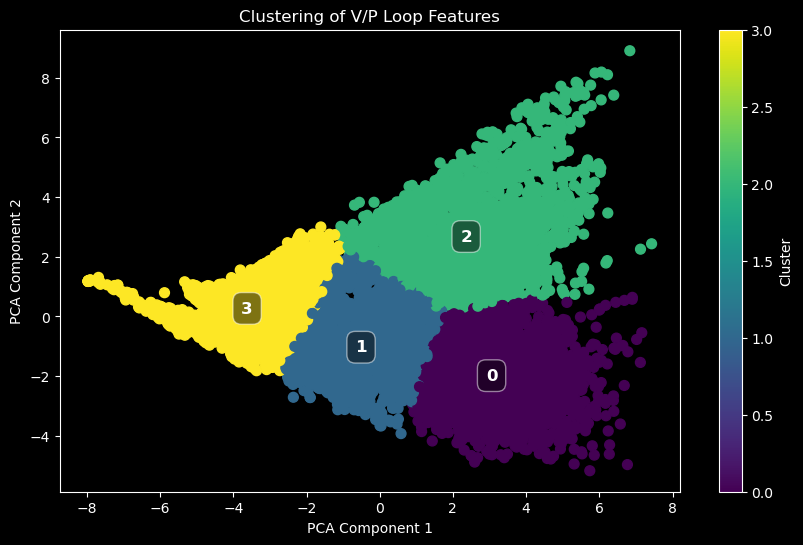

In [4]:
FeatureMatrix_kmeans = KMeans(n_clusters=4, random_state=32)
FeatureMatrix_labels = FeatureMatrix_kmeans.fit_predict(reduced_features)


centroids = FeatureMatrix_kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=FeatureMatrix_labels, cmap='viridis', s=50)
plt.title('Clustering of V/P Loop Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

# Annotate each cluster centroid with its label
for i, (x, y) in enumerate(centroids):
    plt.text(x, y, str(i), color="white", fontsize=12, ha='center', va='center', fontweight='bold',
             bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))

plt.show()


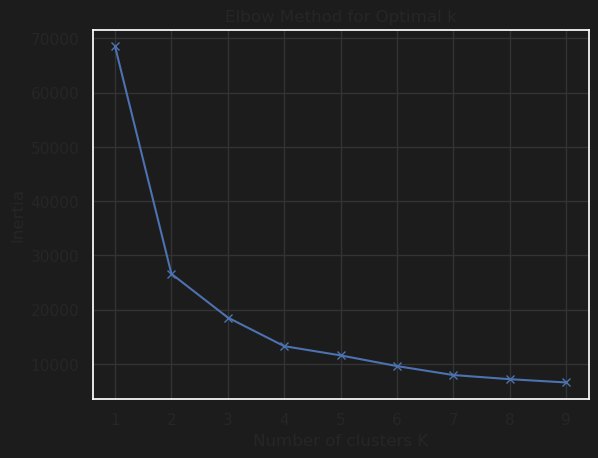

In [20]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(reduced_features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [21]:
silhouette_kms = silhouette_score(reduced_features, FeatureMatrix_labels)
silhouette_kms

0.4558250121674225

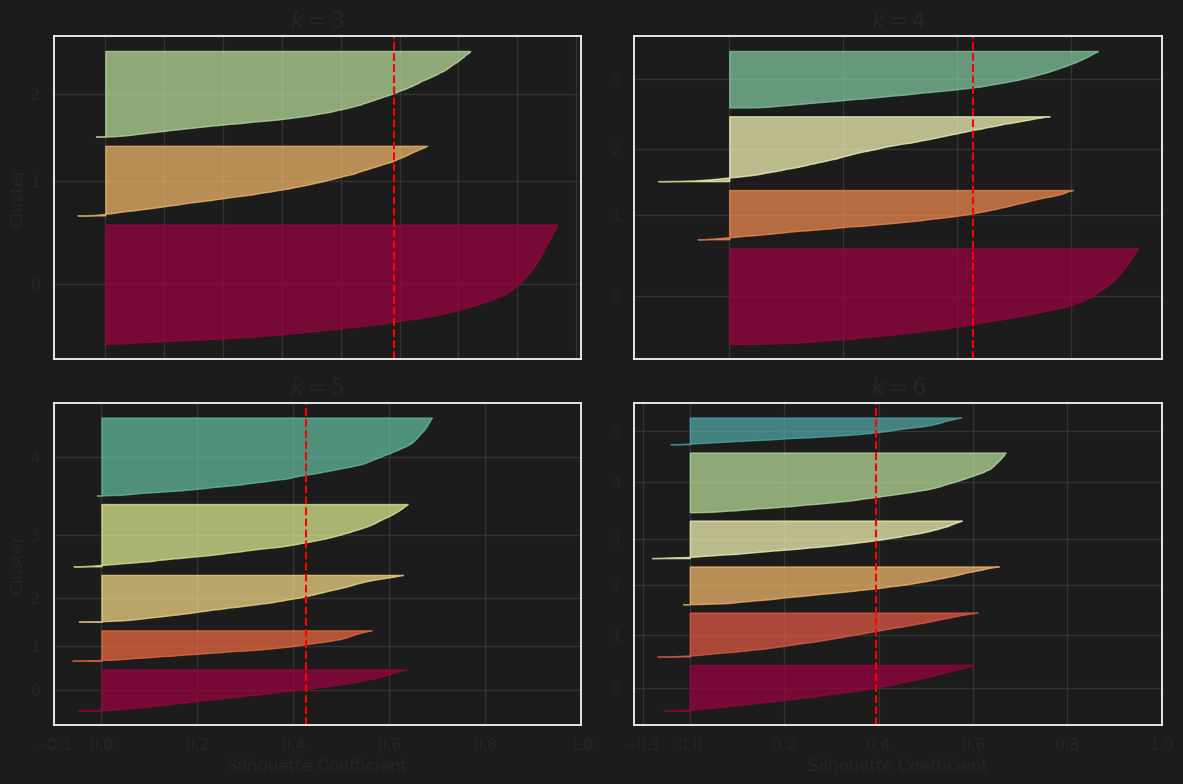

In [447]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(reduced_features)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(reduced_features, model.labels_)
                     for model in kmeans_per_k[1:]]

# Use enumerate to correctly index each subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2x2 array for easier indexing

for plot_idx, k in enumerate((3,4,5,6)):
    ax = axes[plot_idx]  # Access the correct subplot

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(reduced_features, y_pred)

    padding = len(reduced_features) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        ax.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_formatter(FixedFormatter(range(k)))
    ax.set_title(f"$k={k}$", fontsize=16)
    
    if plot_idx % 2 == 0:
        ax.set_ylabel("Cluster")
    
    if plot_idx >= 2:
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax.set_xlabel("Silhouette Coefficient")
    else:
        ax.tick_params(labelbottom=False)

    ax.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")

plt.tight_layout()
plt.show()

>## **Experimentation** Neural Network - Self Organizing Maps

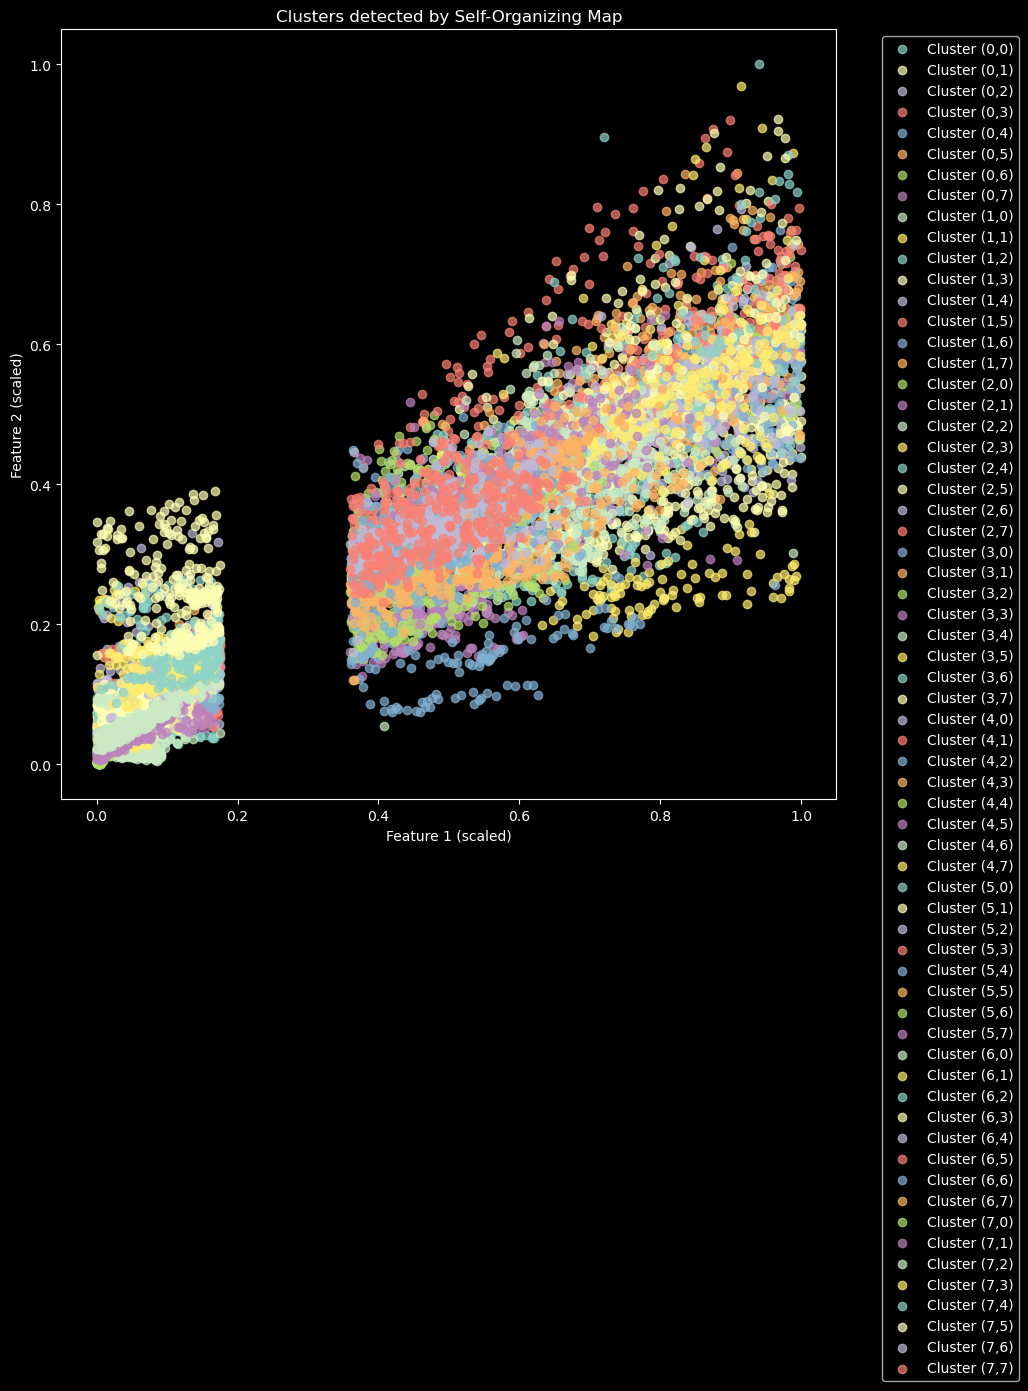

In [15]:
# Initialize weights and train the SOM
NN_scaler = MinMaxScaler()
data_scaled = NN_scaler.fit_transform(Experimental_DF)

Neural_Grid = (8, 8)
Neural_SOM = MiniSom(Neural_Grid[0], Neural_Grid[1], data_scaled.shape[1], sigma=1.0, learning_rate=0.5)


Neural_SOM.random_weights_init(data_scaled)
Neural_SOM.train_random(data_scaled, num_iteration=10000) 


win_map = Neural_SOM.win_map(data_scaled)

plt.figure(figsize=(10, 10))
for i in range(Neural_Grid[0]):
    for j in range(Neural_Grid[1]):
        if (i, j) in win_map:
            cluster = np.array(win_map[(i, j)])
            plt.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster ({i},{j})", alpha=0.7)

plt.title("Clusters detected by Self-Organizing Map")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


labels = np.array([Neural_SOM.winner(x) for x in data_scaled])
FeatureMatrix['Cluster'] = [str(label) for label in labels]  

In [21]:
# Calculate Quantization Error
quantization_error = np.mean([np.linalg.norm(x - Neural_SOM.get_weights()[Neural_SOM.winner(x)]) for x in data_scaled])
print(f"Quantization Error: {quantization_error}")


Quantization Error: 0.19584499304636113


>## **Experimentation** DBSCAN

In [377]:
TF_Cluster_dbscan = DBSCAN(eps=0.05, min_samples=5)
TF_Cluster_dbscan.fit(reduced_features)
TF_Cluster_dbscan.labels_[:10]
TF_Cluster_dbscan.core_sample_indices_[:10]

array([ 0,  1,  9, 11, 12, 13, 15, 18, 19, 20])

In [176]:
TF_Cluster_dbscan.components_[:3]

array([[ 1.6069183 , -1.01999973],
       [ 3.97742768, -2.34410302],
       [ 2.2427434 , -2.85596718]])

In [177]:
TF_Cluster_dbscan2 = DBSCAN(eps=0.2)
TF_Cluster_dbscan2.fit(reduced_features)

DBSCAN(eps=0.2)

In [378]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

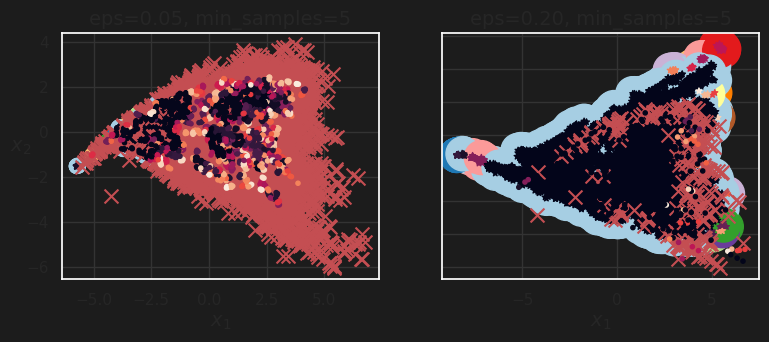

In [379]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(TF_Cluster_dbscan, reduced_features, size=100)

plt.subplot(122)
plot_dbscan(TF_Cluster_dbscan2, reduced_features, size=600, show_ylabels=False)
plt.show()

>## **Experimentation** Bayesian - Gaussian Mixture

In [10]:
# Assuming `plot_centroids` is defined elsewhere and available

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# Set a dark theme for the plot using Seaborn
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#1c1c1c", "grid.color": "#333333", "figure.facecolor": "#1c1c1c"})

def plot_centroids(centroids, weights=None, circle_color='#2ECC71', cross_color='white'):
    # Filter centroids by weight, if applicable
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    
    # Plot centroids with darker colors
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=120, linewidths=3,
                edgecolor=circle_color, facecolor='none', zorder=10, alpha=1.0)
    
    # Annotate centroids with index labels
    for idx, (x, y) in enumerate(centroids):
        plt.text(x, y, str(idx), color=cross_color, fontsize=14,
                 ha='center', va='center', fontweight='bold', zorder=15)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    # Define the plot limits and mesh grid
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    # Score samples for contour plotting
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot filled contours for the density with darker colors
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12), cmap="inferno", alpha=0.9)

    # Add contour lines in a darker shade for contrast
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12), linewidths=1, colors='dimgray')

    # Plot decision boundaries for clusters in a bold color
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='#FF5733', linestyles='dashed', zorder=15)

    # Plot data points with a darker blue color
    plt.scatter(X[:, 0], X[:, 1], color='#1f1f1f', s=20, marker='o', alpha=0.8)

    # Plot centroids
    plot_centroids(clusterer.means_, clusterer.weights_)

    # Customize axis labels and grid colors
    plt.xlabel("$x_1$", fontsize=14, color="white")
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0, color="white")
    else:
        plt.tick_params(labelleft=False)

    plt.xticks(color="white")
    plt.yticks(color="white")
    
    plt.show()

In [46]:
bgm = BayesianGaussianMixture(
    n_components=5, 
    covariance_type='full',
    n_init=10,
    tol=1e-10,
    max_iter=50,
    random_state=42,
    reg_covar=1e-1
)
bgm.fit(reduced_features)
np.round(bgm.weights_, 4)

/home/molderon/.local/lib/python3.12/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.2179, 0.23  , 0.2817, 0.1884, 0.0821])

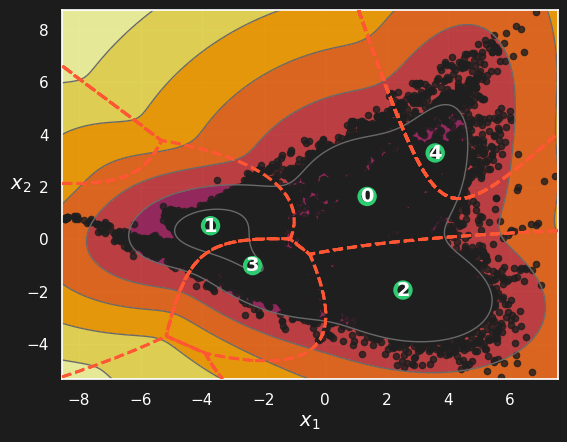

In [47]:
plot_gaussian_mixture(bgm, reduced_features)

In [48]:

BGM_labels = bgm.predict(reduced_features)
silhouette_avg = silhouette_score(reduced_features, BGM_labels)
silhouette_avg

0.39579353491052593

> # ⚠️ **Attach Labels - for algorithm with best silhouette score** 

In [16]:
DataSet = pd.DataFrame()

DataSet = pd.read_csv("TEST_Cluster26Hz.csv")
DataSet['cluster'] = Experimental_DF['Cluster']
#DataSet.drop(DataSet.columns[[0]], axis=1, inplace=True)

In [17]:
Answer_List = DataSet[["breath_id", "cluster"]]

In [18]:
DataSet.to_csv("RF_DataSet.csv")
Answer_List.to_csv("Answers.csv")

In [19]:
DataSet.head()

,breath_id,TV-i,TV-e,pressure,Polynomial_Area,Hull_Area,ft_Tidal_Volume_1,ft_Tidal_Volume_2,ft_Tidal_Volume_3,ft_Tidal_Volume_4,...,ft_Pressure_3,ft_Pressure_4,ft_Pressure_5,Perimeter,Width,Height,Centroid_X,Centroid_Y,Curvature,cluster
0,1.0,0.083334,0.0,5.837492,272.354053,333.601970,861.680524,451.834374,251.375479,36.596856,...,117.650352,17.603779,53.889511,105.280344,28.229702,13.708918,10.771007,10.841247,9.310586,[0 2]
1,3.0,0.000000,0.0,5.064168,282.157479,350.167422,484.607933,183.391093,68.468914,56.159057,...,164.998616,67.671789,116.198749,122.759376,18.353980,22.777895,6.057599,13.534698,11.190253,[6 7]
8,21.0,6.979638,0.0,5.556283,285.462213,284.261625,477.471900,174.175168,90.445702,26.363827,...,252.938132,86.892208,93.935865,82.735227,12.333462,29.526901,5.968399,13.539971,11.201373,[7 7]
9,22.0,14.156295,0.0,6.048398,311.541505,363.457081,774.512804,395.511758,237.230950,106.858771,...,68.527681,36.813551,27.466856,136.055303,49.286837,12.654386,9.681410,8.917604,2.046271,[1 0]
11,26.0,4.268687,0.0,6.189002,416.084625,443.828258,406.942851,178.520409,58.984276,58.751781,...,197.157508,93.959423,138.033832,140.442385,24.620311,25.660283,5.086786,15.595429,3.317151,[0 7]


---
---
---
---
>#  ⚠️ **DEPRACATED CODE** ⚠️ 
---
---
---
---

In [ ]:
if Cloud_compute == True:
    from google.colab import drive
    drive.mount('/content/drive')
    plt.style.use('dark_background')
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
else: 
    plt.style.use('dark_background')
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}

# Loading Boosted Datasets:
- **Training Set**
- **Crossvalidation Set**
- **Multicalss Validation Set**

In [11]:
def Load_Datasets():
    if Cloud_compute == False:
        os.chdir("/home/molderon/Main/WorkSpace/Diploma Project/Classification Algorithms/")
        if MultipleSets == True:
            TrainingSet = pd.DataFrame()
            Training_Scaler = StandardScaler()
            MultiClass = pd.DataFrame()
            MultiClass_Scaler = StandardScaler()
            CrossValidation = pd.DataFrame()
            Crossvalid_Sclaer = StandardScaler()


            TrainingSet = pd.read_csv("Final_TrainingSet.csv")
            MultiClass = pd.read_csv("Final_MultiClass.csv")
            CrossValidation = pd.read_csv("Final_CrossValid.csv")


            TrainingSet.drop(TrainingSet.columns[[0]], axis=1, inplace=True)
            MultiClass.drop(MultiClass.columns[[0]], axis=1, inplace=True)
            CrossValidation.drop(CrossValidation.columns[[0]], axis=1, inplace=True)


            Training_Scaler.fit(TrainingSet)
            MultiClass_Scaler.fit(MultiClass)
            Crossvalid_Sclaer.fit(CrossValidation)


            TrainingSet = pd.DataFrame(Training_Scaler.transform(TrainingSet), columns=TrainingSet.columns)
            MultiClass = pd.DataFrame(MultiClass_Scaler.transform(MultiClass), columns=MultiClass.columns)
            CrossValidation = pd.DataFrame(Crossvalid_Sclaer.transform(CrossValidation), columns=CrossValidation.columns)

            TrainingSet.dropna()
            MultiClass.dropna()
            CrossValidation.dropna()
            return TrainingSet, MultiClass, CrossValidation

        else:
            FullSet = pd.DataFrame()
            FullSet = pd.read_csv("ClusterSet_26Hz.csv")
            FullSet.drop(FullSet.columns[[0]], axis=1, inplace=True)
            return FullSet
    else:

        if MultipleSets == True:
            TrainingSet = pd.DataFrame()
            Training_Scaler = StandardScaler()
            MultiClass = pd.DataFrame()
            MultiClass_Scaler = StandardScaler()
            CrossValidation = pd.DataFrame()
            Crossvalid_Sclaer = StandardScaler()


            TrainingSet = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Final_TrainingSet.csv")
            MultiClass = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Final_MultiClass.csv")
            CrossValidation = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Final_CrossValid.csv")


            TrainingSet.drop(TrainingSet.columns[[0]], axis=1, inplace=True)
            MultiClass.drop(MultiClass.columns[[0]], axis=1, inplace=True)
            CrossValidation.drop(CrossValidation.columns[[0]], axis=1, inplace=True)
    
    
            Training_Scaler.fit(TrainingSet)
            MultiClass_Scaler.fit(MultiClass)
            Crossvalid_Sclaer.fit(CrossValidation)
    
    
            TrainingSet = pd.DataFrame(Training_Scaler.transform(TrainingSet), columns=TrainingSet.columns)
            MultiClass = pd.DataFrame(MultiClass_Scaler.transform(MultiClass), columns=MultiClass.columns)
            CrossValidation = pd.DataFrame(Crossvalid_Sclaer.transform(CrossValidation), columns=CrossValidation.columns)
    

            TrainingSet.dropna()
            MultiClass.dropna()
            CrossValidation.dropna()
            return TrainingSet, MultiClass, CrossValidation

        else:
            FullSet = pd.DataFrame()
            FullSet = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/ClusterSet.csv")
            FullSet.drop(FullSet.columns[[0]], axis=1, inplace=True)
            return FullSet


In [12]:
def Plot_Hysteresis(Hysteresis_Dynamics: pd.DataFrame):
    TV_i = np.array(Hysteresis_Dynamics['TV-i'])
    TV_e = np.array(Hysteresis_Dynamics['TV-e'])
    pressure = np.array(Hysteresis_Dynamics['pressure'])

    TV_total = TV_i + TV_e

    plt.ion() 
    fig, ax = plt.subplots()
    line, = ax.plot([], [], marker='o', linestyle='-', color='b', label='Hysteresis (TV-total / Pressure)')

    ax.set_title('Hysteresis Loop: TV-total/Pressure - 32Hz')
    ax.set_xlabel('TV-total (TV-i + TV-e)')
    ax.set_ylabel('Pressure')
    ax.legend()

    def update_plot(x_data, y_data):
        line.set_data(x_data, y_data)
        ax.relim()          
        ax.autoscale_view() 
        fig.canvas.draw()   
        fig.canvas.flush_events() 

    for i in range(len(TV_total)):
        update_plot(TV_total[:i+1], pressure[:i+1])

    plt.ioff()
    plt.show()

In [13]:
def Create_Subset(Dataset: pd.DataFrame, data_slice: float):
    
    gss = GroupShuffleSplit(test_size=((100 - data_slice)/100), random_state=42)
    for idx, _ in gss.split(Dataset, groups=Dataset['breath_id']):
        ExampleSet = Dataset.iloc[idx]
    return ExampleSet

In [14]:
def Normalise_DataSet(DataSet: pd.DataFrame):
    scaler = StandardScaler()
    Scaled_DataSet = pd.DataFrame(
        scaler.fit_transform(DataSet),
        columns=DataSet.columns
    )
    return Scaled_DataSet

In [15]:
Cluster_DataSet = Load_Datasets()

In [16]:
Cluster_DataSet = Load_Datasets() # Full DataSet
Mini_ClusterSet = Create_Subset(Cluster_DataSet, 0.5) # 0.5% of provided set
Medium_ClusterSet = Create_Subset(Cluster_DataSet, 40) # 30% of the DataSet

In [17]:
Cluster_DataSet = Normalise_DataSet(Cluster_DataSet)
Mini_ClusterSet = Normalise_DataSet(Mini_ClusterSet)
Medium_ClusterSet = Normalise_DataSet(Medium_ClusterSet)

>Pipeline Test code

In [19]:
Optional_Cluster_ranges: dict = field(default_factory=dict)
init_params: int = field(default_factory=int)

Optional_Cluster_ranges ={'min': 3, 'max':15}
init_params = 80

seed = 0
np.random.seed(seed)

## >> |Open Questions
- Q: Would the native system handel the Time Warping?
- **A: Corrent.**

- Q: How does KN + DTW perform **constants** ?
- A: 

- Q: How does DTW with Hierarchical Clustering perfom **constants** ?
- **A: Heavily Overfits the DataSet**

- Q: How does Hidden Markov Models perfom **constants** ?
- **A: Delta parameter does not converge**

- Q: Best performing Cluster Method
- A: KNN + DTW

- Q: Optimal Set-up parameters?
- A:

## Conclusions:


>## **Experimentation** DWT + KN

In [20]:
def Experiment_DTW_KMEANS(DataSet: pd.DataFrame, n_cluters: int):
    k_means = TimeSeriesKMeans(n_clusters=n_cluters, metric="dtw", random_state=0)
    starttime = time.time()
    
    Time_Series_Data = DataSet.groupby('breath_id').apply(
            lambda x : x [['TV-i', 'TV-e', 'pressure', 'Polynomial_Area']].values
    ).to_list()

    k_means.fit(Time_Series_Data)
    KMEANS_lables = k_means.labels_

    print(f"Time for execution:{time.time() - starttime}")
    print(KMEANS_lables)
    return k_means, Time_Series_Data


In [23]:
DTW_model, TSD_KNN = Experiment_DTW_KMEANS(Cluster_DataSet, 5)
joblib.dump(DTW_model, "DTW_KNN.pkl")

/tmp/ipykernel_241680/526740799.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Time_Series_Data = DataSet.groupby('breath_id').apply(


Time for execution:3965.622593641281
[4 2 2 ... 3 2 0]


['DTW_KNN.pkl']

>## **Experimentation** DTW + Hierarchical Clustering

In [25]:
def Experiment_DTW_Hierarchical(DataSet: pd.DataFrame):
    starttime = time.time()
    
    Time_Series_Data = DataSet.groupby('breath_id').apply(
            lambda x : x [['TV-i', 'TV-e', 'pressure', 'Polynomial_Area']].values
    ).to_list()

    dtw_distance = cdist_dtw(Time_Series_Data)

    linked = linkage(dtw_distance, method="ward")

    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    print(f"Time for execution:{time.time() - starttime}")
    plt.figure(figsize=(10, 7))
    plt.title("Hierarchical Clustering Dendrogram with DTW")
    plt.xlabel("Breath IDs")
    plt.ylabel("Distance")
    plt.show()

In [ ]:
Experiment_DTW_Hierarchical(Medium_ClusterSet)

>## **Experimentation** Hidden Markov Models

In [44]:
def Experiment_HMM(DataSet: pd.DataFrame, n_states: int):
    starttime = time.time()

    model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)
    model.fit(DataSet)
    hidden_states = model.predict(DataSet)
    print(hidden_states)
    #print(f"Time for execution:{time.time() - starttime}")
    return model

In [47]:
hmm_Model = Experiment_HMM(reduced_features, 10)

[8 4 1 ... 5 4 1]


In [49]:
print(hmm_Model.score(reduced_features))

-133518.610458659


>## **Final Model Analysis**


In [24]:
def Draw_Reconstructed_Cycles(breath_id: int, DataSet: pd.DataFrame):
    Random_ids = pd.DataFrame()# 3 4 7 89 104 135 157 163 176 189 190 204 219 231 258 271 277 286 289d 299d 332 344 4447 13992 23994 35788 45321 57752 62697 69220 69433 79073
    Random_ids = DataSet[DataSet['breath_id'] == breath_id].copy()
    Random_ids = Random_ids.sort_values(by="time_step")

    Hysteresis_Dynamics: dict = field(default_factory=dict)
    target_columns = ["TV-i", "TV-e","pressure", "R", "C", "time_step"]

    Hysteresis_Dynamics = Random_ids[target_columns].to_dict(orient ='list')
    Plot_Hysteresis(Hysteresis_Dynamics)

# **Dynamic Time Warping -  Inertia**

For n_clusters = 4, the average silhouette_score is : 0.32
For n_clusters = 5, the average silhouette_score is : 0.33
For n_clusters = 8, the average silhouette_score is : 0.29


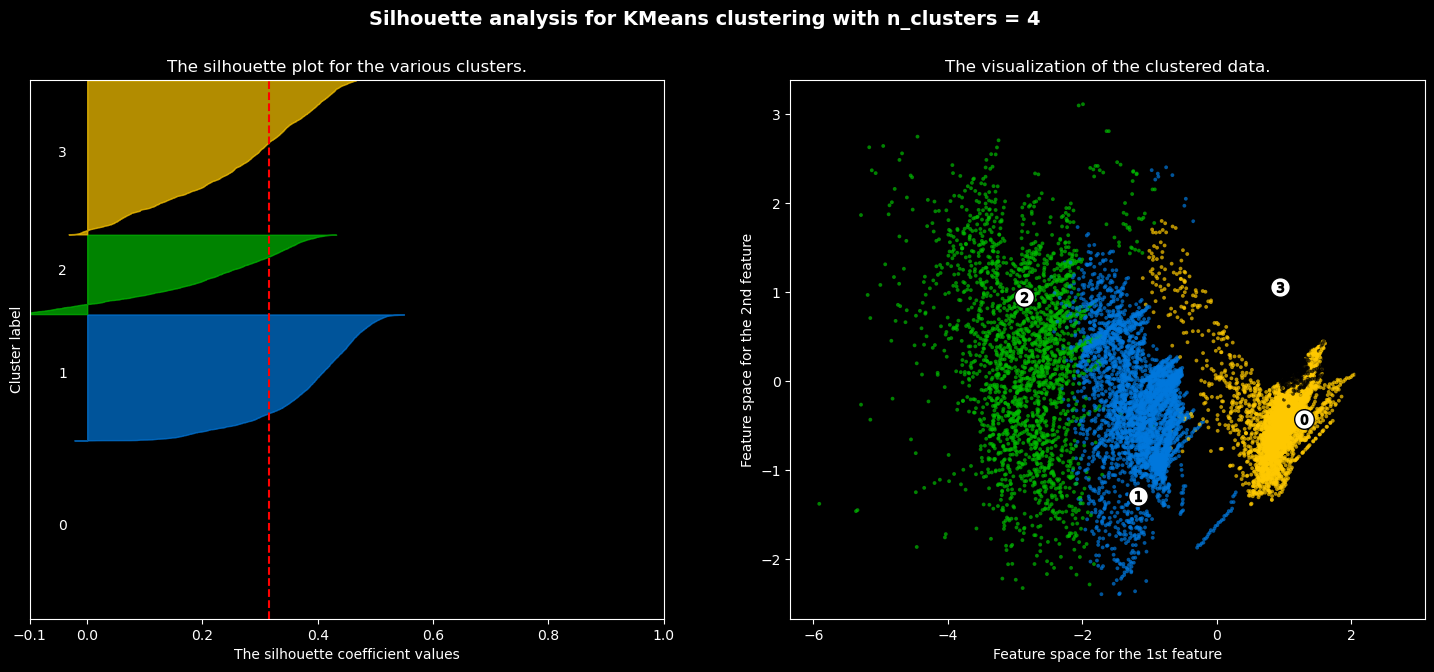

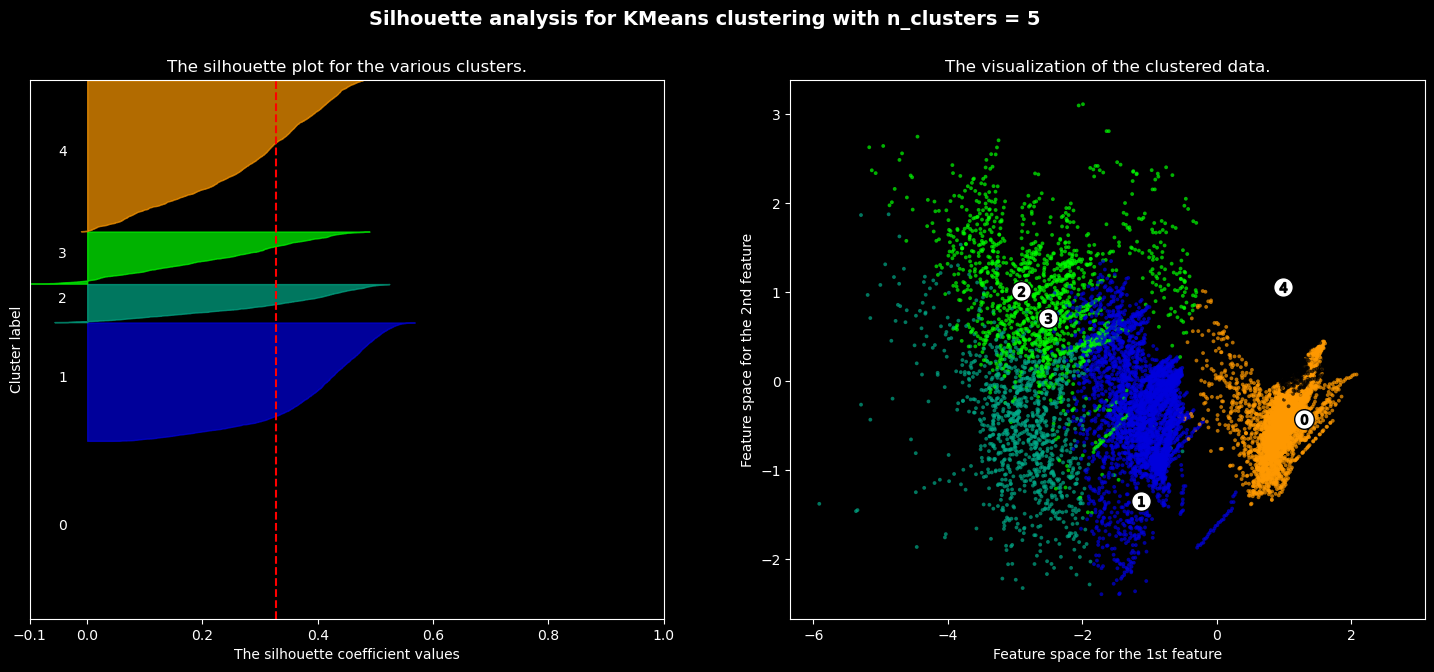

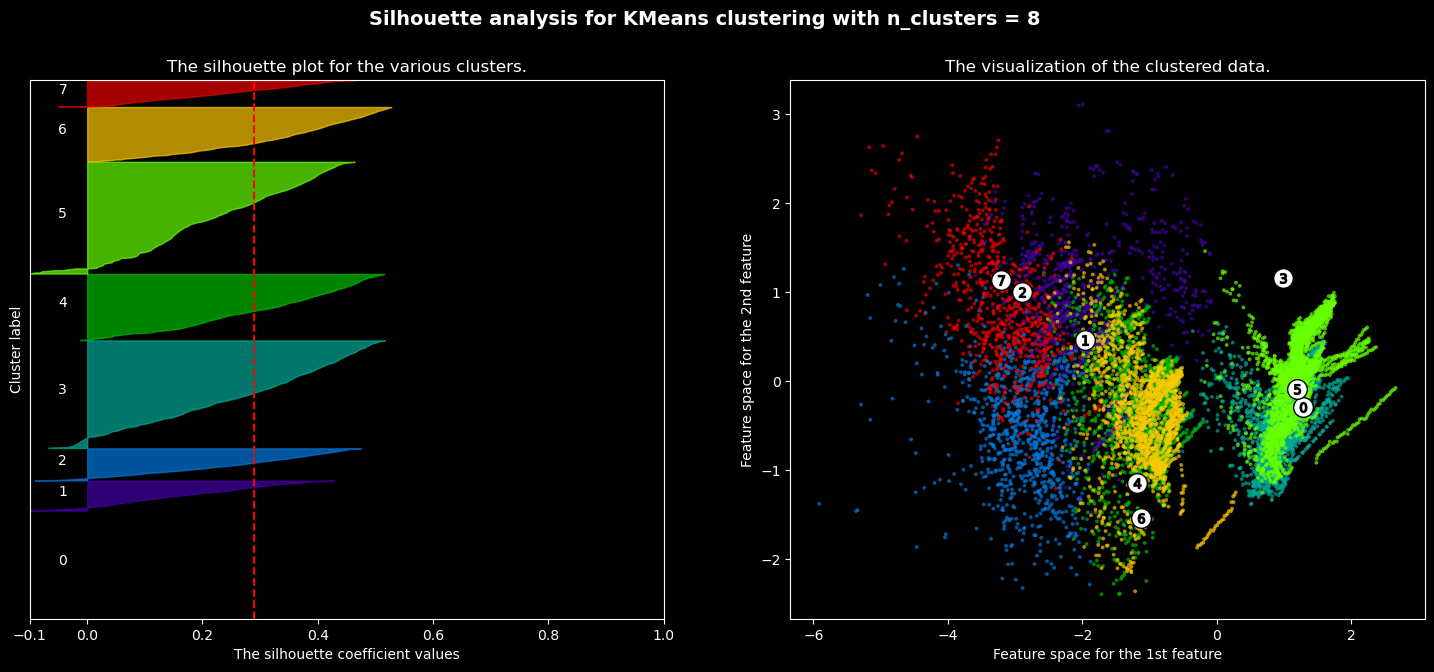

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming X_train is either a DataFrame or 2D numpy array
# Flattening the data into 2D format if necessary
if Mini_ClusterSet.ndim > 2:
    train_pca = Mini_ClusterSet.reshape(Mini_ClusterSet.shape[0], -1)  # Flatten to 2D
else:
    train_pca = Mini_ClusterSet

# Apply PCA to reduce dimensions to capture 95% of variance
pca = PCA(n_components=0.95)
train_pca = pca.fit_transform(train_pca)

X = train_pca  # Reduced data for clustering

# Define range for number of clusters to evaluate
range_n_clusters = [4, 5,8]

for n_clusters in range_n_clusters:
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Silhouette plot settings
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize KMeans with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # Calculate average silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.2f}")

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Plot the clustered data
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 4], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Plot the cluster centers
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k"
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()
